In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('house_prices_data_training_data.csv', sep=',', header=None)
dataset.dropna(inplace=True)
dataset = dataset.drop(0)
dataset = dataset.drop(0, axis = 1)
dataset = dataset.drop(1, axis = 1)

dataset = dataset.convert_dtypes() 

dataset.apply(pd.to_numeric).dtypes                                             
dataset = dataset.astype(float)

In [50]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0] 
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


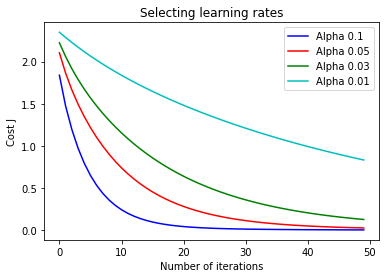

In [51]:
X_norm, mu, sigma = feature_normalize(dataset)
print('mean:', mu)
print('standard deviation:', sigma)
m = dataset.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(dataset.iloc[:, 2].astype(float).values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))
alpha = [0.1, 0.05, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [52]:
iterations = 250
alpha = 0.1
theta, j = gradient_descent(X, y, theta, alpha, iterations)
print('Thetas')
print(theta)

bedrooms = (2, - mu[0]/sigma[0])
bathrooms = (1.75, - mu[1]/sigma[1])
sqft_living = (3000, mu[2]/sigma[2])
sqft_lot = (5560, mu[3]/sigma[3])
floors = (1.5, mu[4]/sigma[4])
waterfront = (0, mu[5]/sigma[5])
view = (4, mu[6]/sigma[6])
condition = (5, mu[7]/sigma[7])
grade = (11, mu[8]/sigma[8])
sqft_above = (1300, mu[9]/sigma[9])
sqft_basement = (300, mu[10]/sigma[10])
yr_built = (2004, mu[11]/sigma[11])
yr_renovated = (1800, mu[12]/sigma[12])
zipcode = (98017, mu[13]/sigma[13])
lat = (47.5316, mu[14]/sigma[14])
long_ = (-122.115, mu[15]/sigma[15])
sqft_living15 = (1700, mu[16]/sigma[16])
sqft_lot15 = (3770, mu[17]/sigma[17])

y_pred = theta[0] + theta[1]*bedrooms + theta[2]*bathrooms + theta[3]*sqft_living + theta[4]*sqft_lot + theta[5]*floors + theta[6]*waterfront + theta[7]*view + theta[8]*condition + theta[9]*grade + theta[10]*sqft_above + theta[11]*sqft_basement + theta[12]*yr_built + theta[13]*yr_renovated + theta[14]*zipcode + theta[15]*lat + theta[16]*long_ + theta[17]*sqft_living15 + theta[18]*sqft_lot15
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

Thetas
[[ 2.06160064e+00]
 [ 4.36136659e-04]
 [ 1.13119183e-04]
 [ 7.56835903e-01]
 [ 7.76800922e-04]
 [ 4.49622710e-05]
 [ 3.19657425e-04]
 [-1.31744205e-04]
 [ 4.01519841e-05]
 [ 2.08771402e-04]
 [-7.58462619e-04]
 [ 6.20533146e-04]
 [ 4.48239515e-04]
 [ 1.14614056e-03]
 [ 2.75714826e-04]
 [ 1.13547466e-06]
 [ 6.31015720e-05]
 [-2.28917121e-04]
 [-3.13946836e-04]
 [-9.39177481e-05]]


'Price of a house with 1650 square feet and 3 bedrooms: 2304.497264678776$'

In [53]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [54]:
Xe = np.hstack((np.ones((m,1)),X_norm))
theta_e = normal_eqn(Xe, y) 
 
bedrooms = (4, - mu[0]/sigma[0])
bathrooms = (1.25, - mu[1]/sigma[1])
sqft_living = (1420, mu[2]/sigma[2])
sqft_lot = (6230, mu[3]/sigma[3])
floors = (3, mu[4]/sigma[4])
waterfront = (0, mu[5]/sigma[5])
view = (2, mu[6]/sigma[6])
condition = (4, mu[7]/sigma[7])
grade = (8, mu[8]/sigma[8])
sqft_above = (880, mu[9]/sigma[9])
sqft_basement = (590, mu[10]/sigma[10])
yr_built = (1940, mu[11]/sigma[11])
yr_renovated = (1880, mu[12]/sigma[12])
zipcode = (98019, mu[13]/sigma[13])
lat = (47.7088, mu[14]/sigma[14])
long_ = (-122.045, mu[15]/sigma[15])
sqft_living15 = (1800, mu[16]/sigma[16])
sqft_lot15 = (6730, mu[17]/sigma[17])
 
y_pred = theta_e[0] + theta_e[1]*bedrooms + theta_e[2]*bathrooms + theta_e[3]*sqft_living + theta_e[4]*sqft_lot + theta_e[5]*floors + theta_e[6]*waterfront + theta_e[7]*view + theta_e[8]*condition + theta_e[9]*grade + theta_e[10]*sqft_above + theta_e[11]*sqft_basement + theta_e[12]*yr_built + theta_e[13]*yr_renovated + theta_e[14]*zipcode + theta_e[15]*lat + theta_e[16]*long_ + theta_e[17]*sqft_living15 + theta_e[18]*sqft_lot15
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 1079.3194891348307$'

In [55]:
dataset = pd.read_csv('house_prices_data_training_data.csv', sep=',')
dataset.dropna(inplace=True)
dataset = dataset.drop(columns='id', axis = 1)
dataset = dataset.drop(columns='date', axis = 1)

dataset = dataset.convert_dtypes() 

dataset = dataset.astype(float)
y = dataset.iloc[:, 1]
X = dataset.iloc[:, 2:]
X["bathrooms1"] = X["bathrooms"]**2
X["floors1"] = X["floors"]**2
X["sqft_living1"] = X["sqft_living"]**2
X["sqft_living2"] = X["sqft_living"]**3
X["sqft_lot151"] = X["sqft_lot15"]**4
X["condition1"] = X["condition"]**2
X["zipcode1"] = X["zipcode"]**3


mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


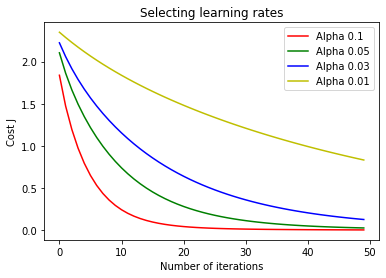

In [56]:
X_norm, mu, sigma = feature_normalize(dataset)
print('mean:', mu)
print('standard deviation:', sigma)
m = dataset.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(dataset.iloc[:, 2].astype(float).values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))
alpha = [0.1, 0.05, 0.03, 0.01]
colors = ['r','g','b','y']
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], 50)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [57]:
theta, _ = gradient_descent(X, y, theta,  0.1, 100)
print('Theta calculated')
print(theta)

Theta calculated
[[ 2.06156751e+00]
 [ 5.73791645e-03]
 [ 5.86069544e-03]
 [ 7.11175298e-01]
 [ 1.44455266e-02]
 [ 1.08288511e-03]
 [ 1.21825852e-02]
 [-1.44386475e-03]
 [ 8.12084903e-06]
 [ 4.73634332e-03]
 [-3.27546638e-03]
 [ 8.69845848e-03]
 [ 1.34269265e-02]
 [ 2.26147603e-02]
 [ 6.31795627e-03]
 [ 2.47205729e-04]
 [ 5.87856562e-04]
 [-2.67830073e-03]
 [-7.37489362e-03]
 [-1.71285622e-03]]


In [58]:
df = pd.read_csv('house_prices_data_training_data.csv', sep=',')

def split_train_valid_test(data,valid_ratio,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    valid_set_size= int(len(data)*valid_ratio)
    valid_indcies=shuffled_indcies[:valid_set_size]
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[valid_set_size:test_set_size+valid_set_size]
    train_indices=shuffled_indcies[test_set_size:]
    return data.iloc[train_indices],data.iloc[valid_indcies],data.iloc[test_indcies]

train_set,valid_set,test_set=split_train_valid_test(dataset,valid_ratio=0.2,test_ratio=0.2)

In [59]:
y = train_set.iloc[:, 1]
X = train_set.iloc[:, 2:]
X["bathrooms1"] = X["bathrooms"]**2
X["floors1"] = X["floors"]**2
X["sqft_living1"] = X["sqft_living"]**2
X["sqft_living2"] = X["sqft_living"]**3
X["sqft_lot151"] = X["sqft_lot15"]**4
X["condition1"] = X["condition"]**2
X["zipcode1"] = X["zipcode"]**3
X_norm, mu, sigma = feature_normalize(dataset)
print('mean:', mu)
print('standard deviation:', sigma)
m = dataset.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))

y = np.array(dataset.iloc[:, 2].astype(float).values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))
alpha = [0.1, 0.05, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50
X.shape

mean: [ 5.33074250e+05  3.36296461e+00  2.06160064e+00  2.05182232e+03
  1.57587327e+04  1.43316295e+00  7.83376854e-03  2.42457914e-01
  3.44852492e+00  7.59236624e+00  1.74974232e+03  3.02080004e+02
  1.96728235e+03  9.02535141e+01  9.80780698e+04  4.75602109e+01
 -1.22215112e+02  1.97323674e+03  1.32822707e+04]
standard deviation: [3.64412151e+05 9.34032388e-01 7.58632316e-01 9.02744154e+02
 4.24551425e+04 5.09662990e-01 8.81636686e-02 7.78856958e-01
 6.67039405e-01 1.16949482e+00 8.05427363e+02 4.49443008e+02
 2.79403058e+01 4.14717703e+02 5.41249245e+01 1.39644240e-01
 1.39135290e-01 6.73186870e+02 2.73524150e+04]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(17999, 20)

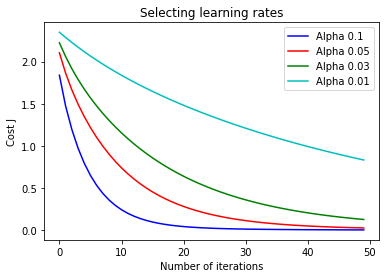

In [60]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()